<a href="https://colab.research.google.com/github/Sudarsanaa/21bds0143_eda_theory_da/blob/main/21BDS0143_da(EDA_final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Sudarsanaa/21bds0143_eda_theory_da/blob/main/21BDS0143_da(EDA_final).ipynb

NAME: SUDARSANAA C R

REG NO: 21BDS0143

EDA THEORY DA

In [43]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [44]:
# Load the dataset
df = pd.read_csv('econmath.csv')

In [45]:
# 1. Dimension of the Dataset
print("Dataset Dimensions (Rows, Columns):", df.shape)

Dataset Dimensions (Rows, Columns): (856, 18)


In [46]:
# 2. Summary of the Dataset
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  856 non-null    int64  
 1   age       856 non-null    int64  
 2   work      856 non-null    float64
 3   study     856 non-null    float64
 4   econhs    856 non-null    int64  
 5   colgpa    856 non-null    float64
 6   hsgpa     856 non-null    float64
 7   acteng    814 non-null    float64
 8   actmth    814 non-null    float64
 9   act       814 non-null    float64
 10  mathscr   856 non-null    int64  
 11  male      856 non-null    int64  
 12  calculus  856 non-null    int64  
 13  attexc    856 non-null    int64  
 14  attgood   856 non-null    int64  
 15  fathcoll  856 non-null    int64  
 16  mothcoll  856 non-null    int64  
 17  score     856 non-null    float64
dtypes: float64(8), int64(10)
memory usage: 120.5 KB
None

Statistical Summary:
         rownames   

In [47]:
# 3. Data Handling - Identifying Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
rownames     0
age          0
work         0
study        0
econhs       0
colgpa       0
hsgpa        0
acteng      42
actmth      42
act         42
mathscr      0
male         0
calculus     0
attexc       0
attgood      0
fathcoll     0
mothcoll     0
score        0
dtype: int64


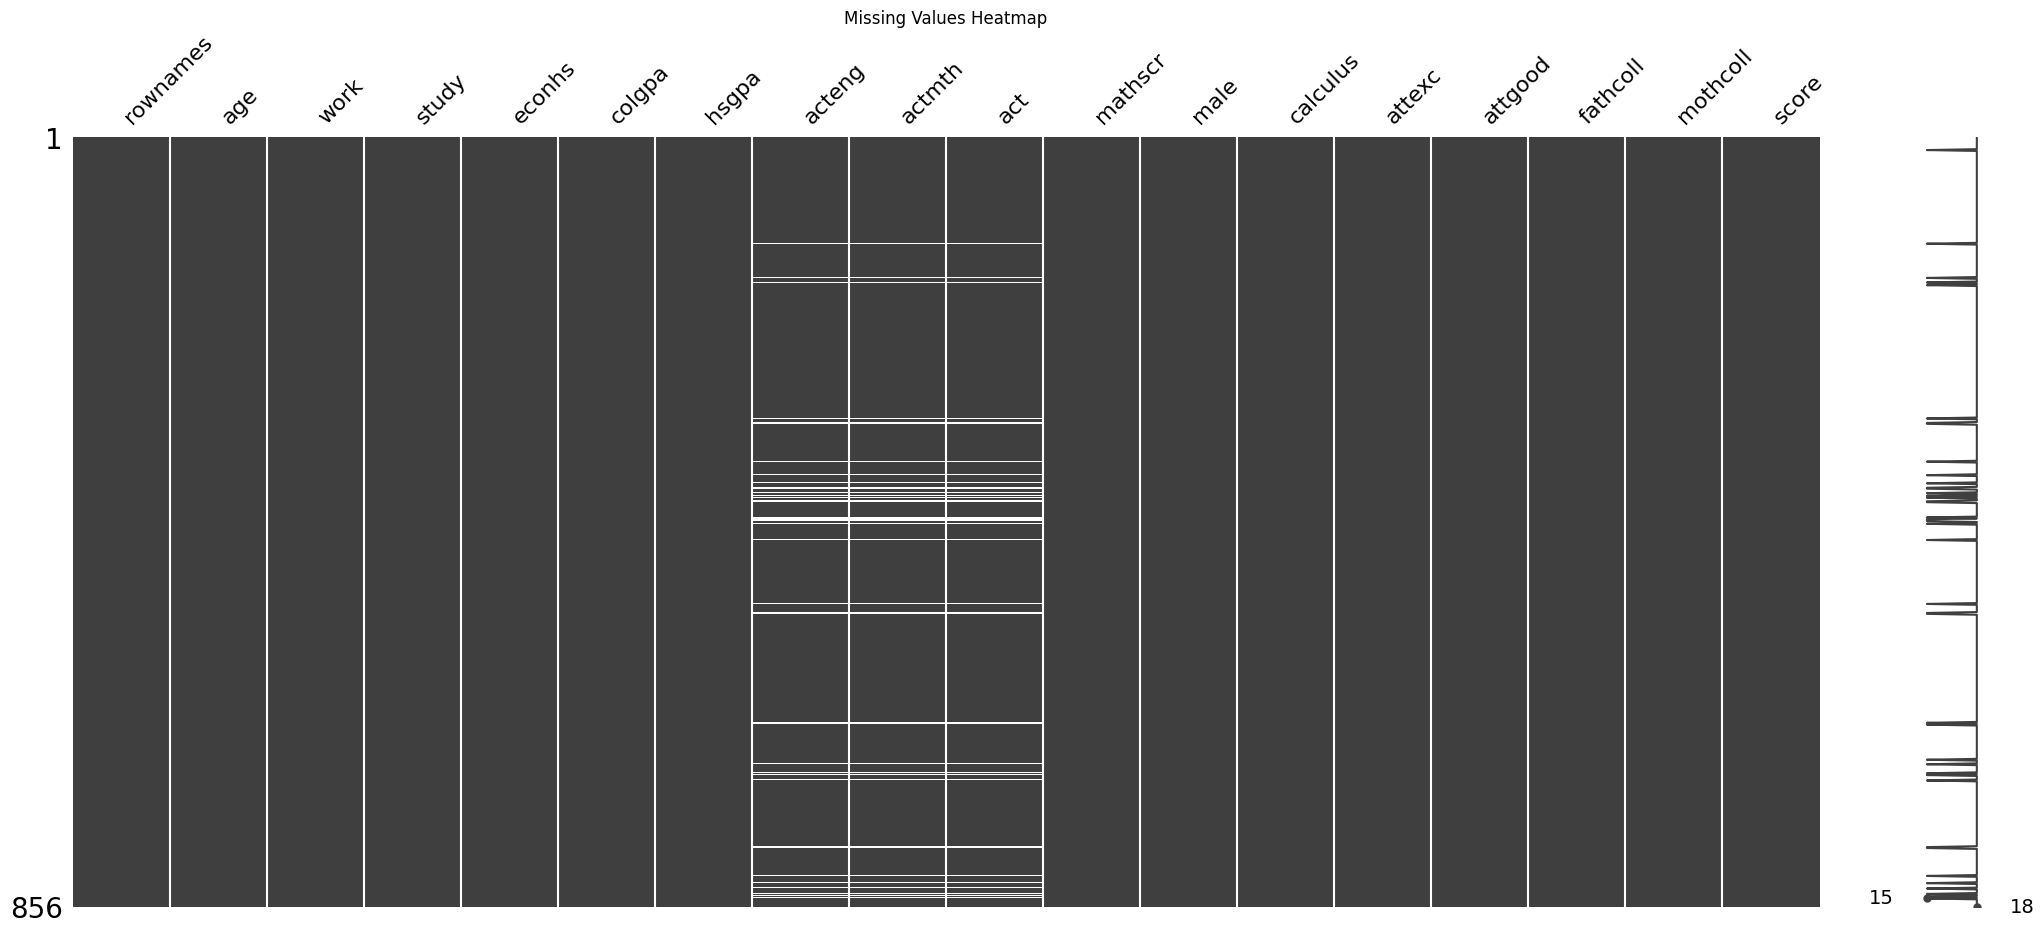

In [48]:
# Visualize missing values
msno.matrix(df)
plt.title("Missing Values Heatmap")
plt.show()


In [49]:
# 4. Data Cleaning - Handling Missing Values
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

In [50]:
# Option 2: Fill missing values (e.g., with mean for numerical columns)
df_filled = df.fillna(df.mean())


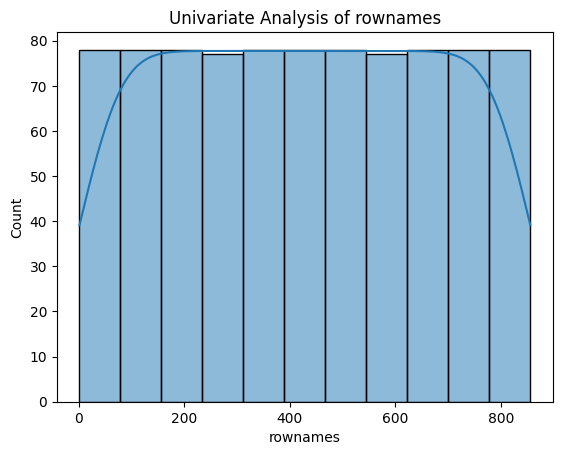

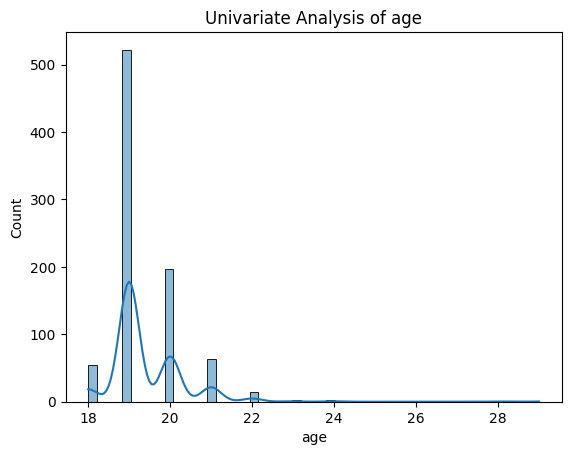

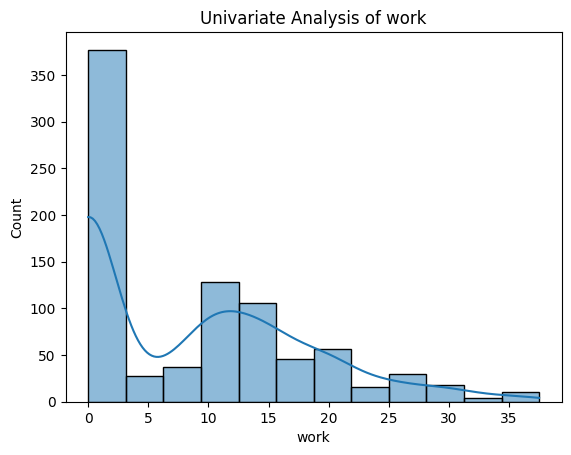

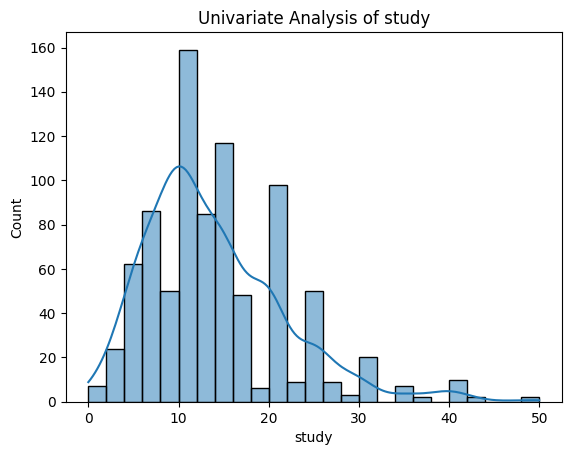

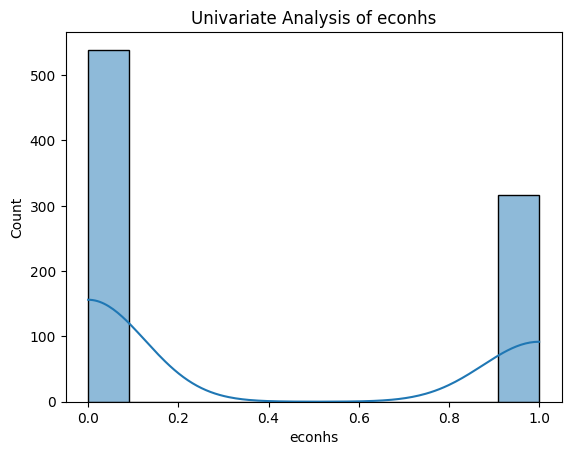

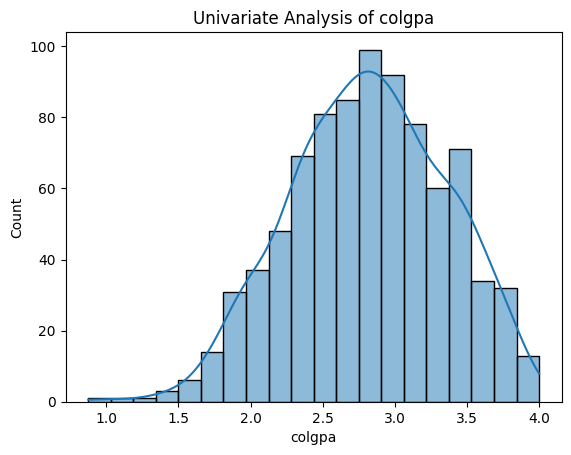

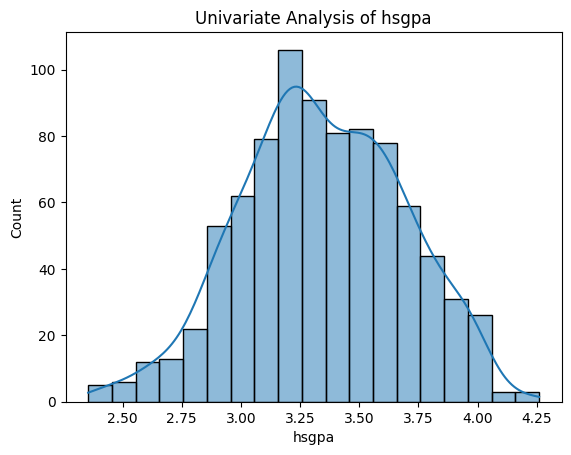

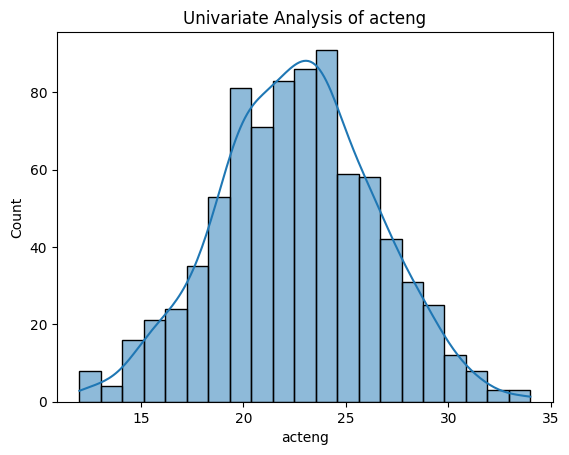

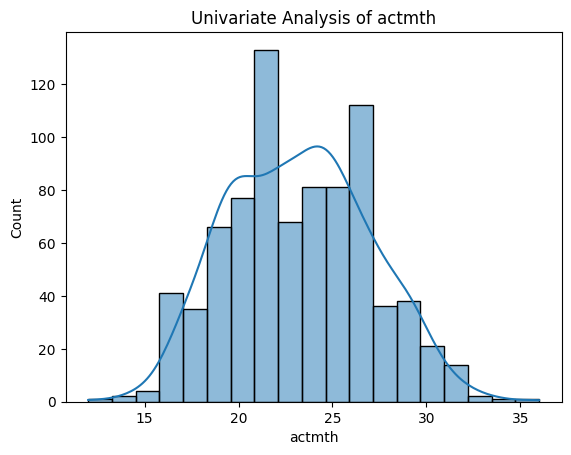

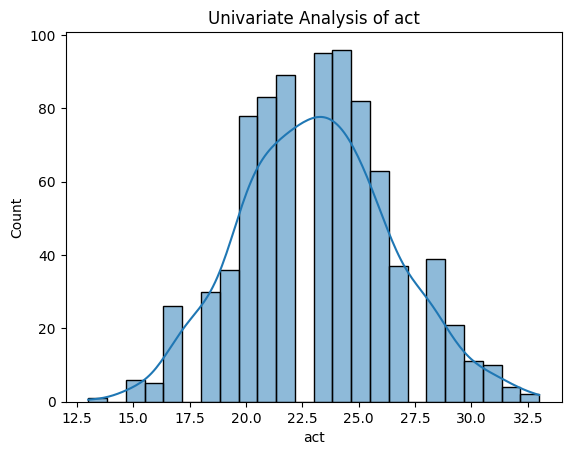

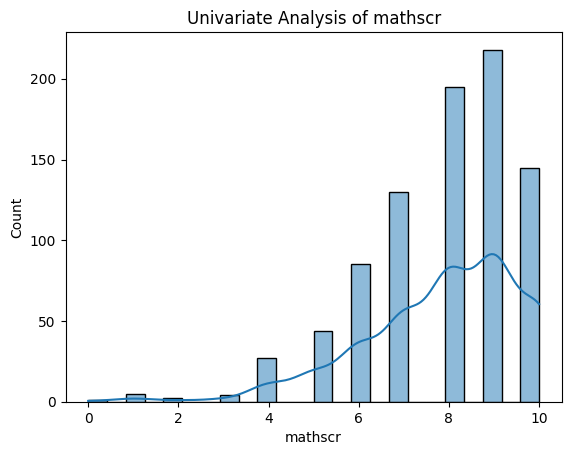

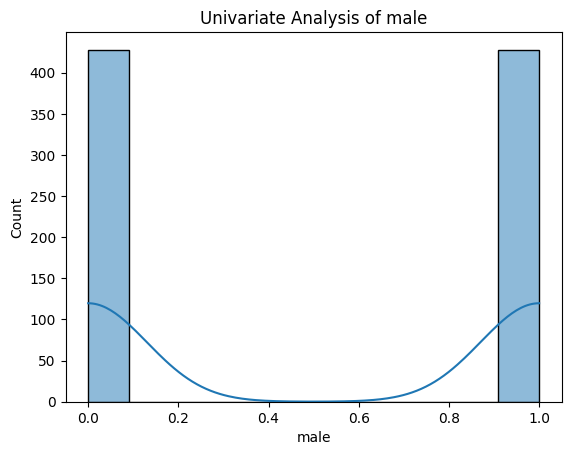

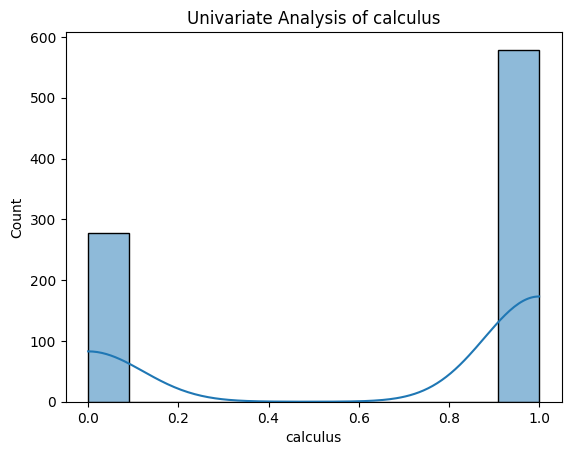

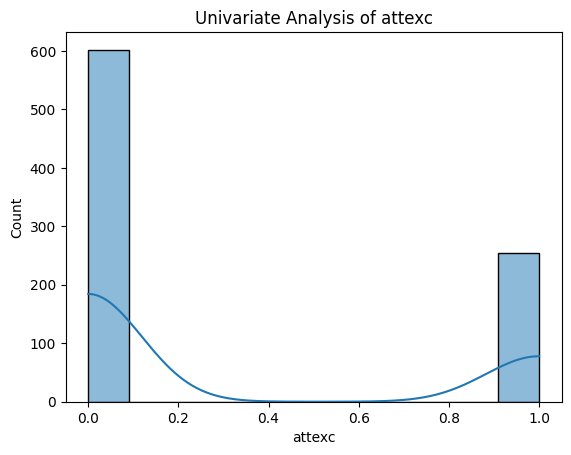

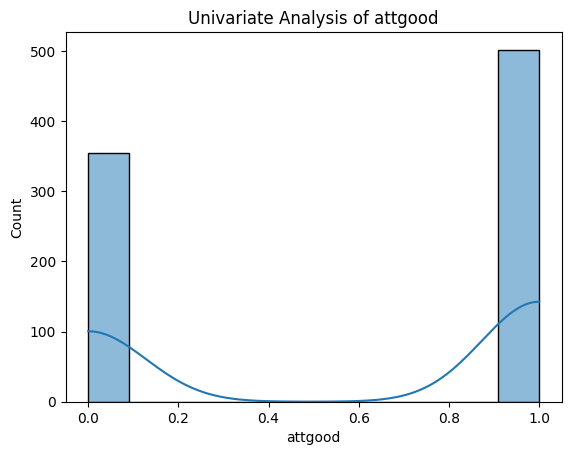

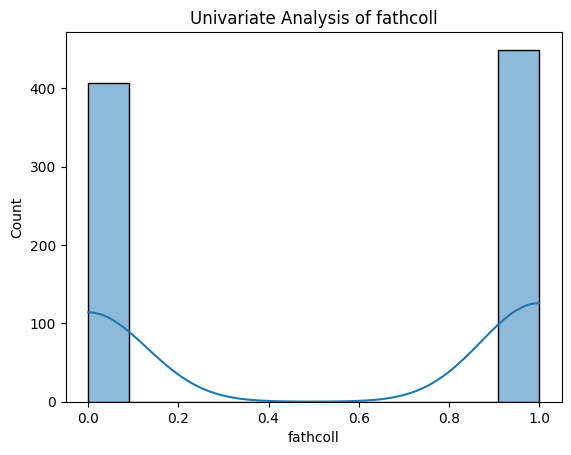

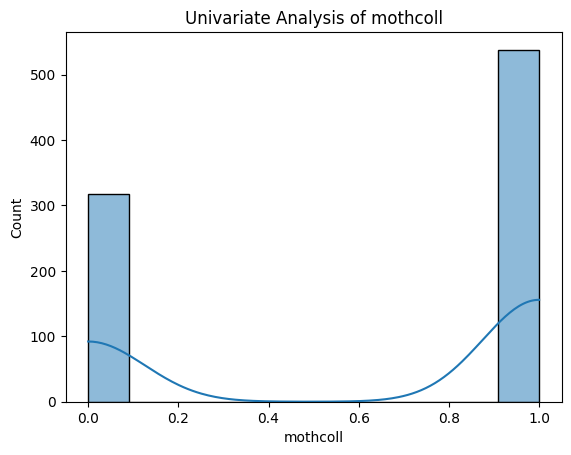

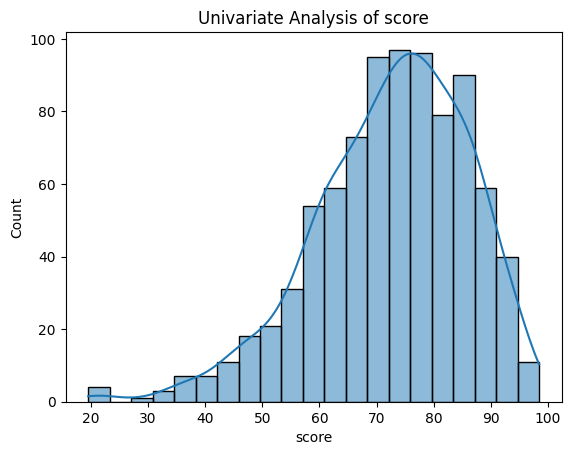

In [51]:
# 5. Univariate Analysis
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.show()

**# MODULE 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, OneHotEncoder

In [5]:
data = pd.read_csv('/content/econmath.csv')

In [6]:
print("Initial Shape of Data:", data.shape)
print("First few rows of the dataset:\n", data.head())
print("Summary of Dataset Info:\n")
data.info()

Initial Shape of Data: (856, 18)
First few rows of the dataset:
    rownames  age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  \
0         1   23  15.0   10.0       0  3.4909  3.355    24.0    26.0  27.0   
1         2   23   0.0   22.5       1  2.1000  3.219    23.0    20.0  24.0   
2         3   21  25.0   12.0       0  3.0851  3.306    21.0    24.0  21.0   
3         4   22  30.0   40.0       0  2.6805  3.977    31.0    28.0  31.0   
4         5   22  25.0   15.0       1  3.7454  3.890    28.0    31.0  32.0   

   mathscr  male  calculus  attexc  attgood  fathcoll  mothcoll  score  
0       10     1         1       0        0         1         1  84.43  
1        9     1         0       0        0         0         1  57.38  
2        8     1         1       1        0         0         1  66.39  
3       10     0         1       0        1         1         1  81.15  
4        8     1         1       0        1         0         1  95.90  
Summary of Dataset Info:

<c

In [7]:
# 1. Data Deduplication - Checking and removing duplicates if present
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicates}")
data = data.drop_duplicates()
print("Shape of data after deduplication:", data.shape)

Number of duplicate rows in the dataset: 0
Shape of data after deduplication: (856, 18)


In [9]:
# 2. Handling Missing Data
# Selecting numeric and categorical columns
numeric_cols = data.select_dtypes(include=np.number).columns
# If your categorical columns are not of type 'object' or 'category',
# you may need to adjust the include parameter.
# For example, if your categorical columns have a dtype of 'int64', you can include it:
categorical_cols = data.select_dtypes(include=['object', 'category', 'int64']).columns

# KNN Imputation for numeric columns, Simple Imputer for categorical columns
knn_imputer = KNNImputer(n_neighbors=5)
simple_imputer = SimpleImputer(strategy='most_frequent')

data[numeric_cols] = knn_imputer.fit_transform(data[numeric_cols])

# Check if categorical_cols is empty before applying SimpleImputer
if len(categorical_cols) > 0:
    data[categorical_cols] = simple_imputer.fit_transform(data[categorical_cols])

print("Data after handling missing values:\n", data.isnull().sum())

Data after handling missing values:
 rownames    0
age         0
work        0
study       0
econhs      0
colgpa      0
hsgpa       0
acteng      0
actmth      0
act         0
mathscr     0
male        0
calculus    0
attexc      0
attgood     0
fathcoll    0
mothcoll    0
score       0
dtype: int64


In [10]:
# 3. Data Encoding - One-Hot Encoding for categorical variables if any
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = ohe.fit_transform(data[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# Merging the encoded categorical data with the main dataframe
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, categorical_encoded_df], axis=1)
print("Data after One-Hot Encoding:\n", data.head())

Data after One-Hot Encoding:
    rownames   age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  \
0       1.0  23.0  15.0   10.0     0.0  3.4909  3.355    24.0    26.0  27.0   
1       2.0  23.0   0.0   22.5     1.0  2.1000  3.219    23.0    20.0  24.0   
2       3.0  21.0  25.0   12.0     0.0  3.0851  3.306    21.0    24.0  21.0   
3       4.0  22.0  30.0   40.0     0.0  2.6805  3.977    31.0    28.0  31.0   
4       5.0  22.0  25.0   15.0     1.0  3.7454  3.890    28.0    31.0  32.0   

   mathscr  male  calculus  attexc  attgood  fathcoll  mothcoll  score  
0     10.0   1.0       1.0     0.0      0.0       1.0       1.0  84.43  
1      9.0   1.0       0.0     0.0      0.0       0.0       1.0  57.38  
2      8.0   1.0       1.0     1.0      0.0       0.0       1.0  66.39  
3     10.0   0.0       1.0     0.0      1.0       1.0       1.0  81.15  
4      8.0   1.0       1.0     0.0      1.0       0.0       1.0  95.90  


In [11]:
# 4. Data Scaling - Standardization for numeric values
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print("Data after standardization:\n", data[numeric_cols].head())

Data after standardization:
    rownames       age      work     study    econhs    colgpa     hsgpa  \
0 -1.730029  3.837667  0.691135 -0.502317 -0.766894  1.260292  0.036623   
1 -1.725982  3.837667 -0.935215  1.100280  1.303961 -1.331995 -0.359615   
2 -1.721935  1.701749  1.775369 -0.245901 -0.766894  0.503983 -0.106139   
3 -1.717888  2.769708  2.317485  3.343917 -0.766894 -0.250090  1.848831   
4 -1.713841  2.769708  1.775369  0.138722  1.303961  1.734616  1.595355   

     acteng    actmth       act   mathscr  male  calculus    attexc   attgood  \
0  0.378469  0.753364  1.184003  1.227916   1.0  0.691673 -0.649559 -1.190831   
1  0.108944 -0.868159  0.270879  0.650073   1.0 -1.445771 -0.649559 -1.190831   
2 -0.430107  0.212856 -0.642245  0.072230   1.0  0.691673  1.539506 -1.190831   
3  2.265147  1.293872  2.401502  1.227916  -1.0  0.691673 -0.649559  0.839750   
4  1.456570  2.104633  2.705877  0.072230   1.0  0.691673 -0.649559  0.839750   

   fathcoll  mothcoll     score  

In [14]:
# 5. Binning for 'govtspendgdp' (or another continuous variable, if applicable)
# Adjusting for real-world application by showing economic insights
if 'govtspendgdp' in data.columns:
    binner = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
    data['govtspendgdp_binned'] = binner.fit_transform(data[['govtspendgdp']])
    print("Data after binning 'govtspendgdp':\n", data[['govtspendgdp', 'govtspendgdp_binned']].head())

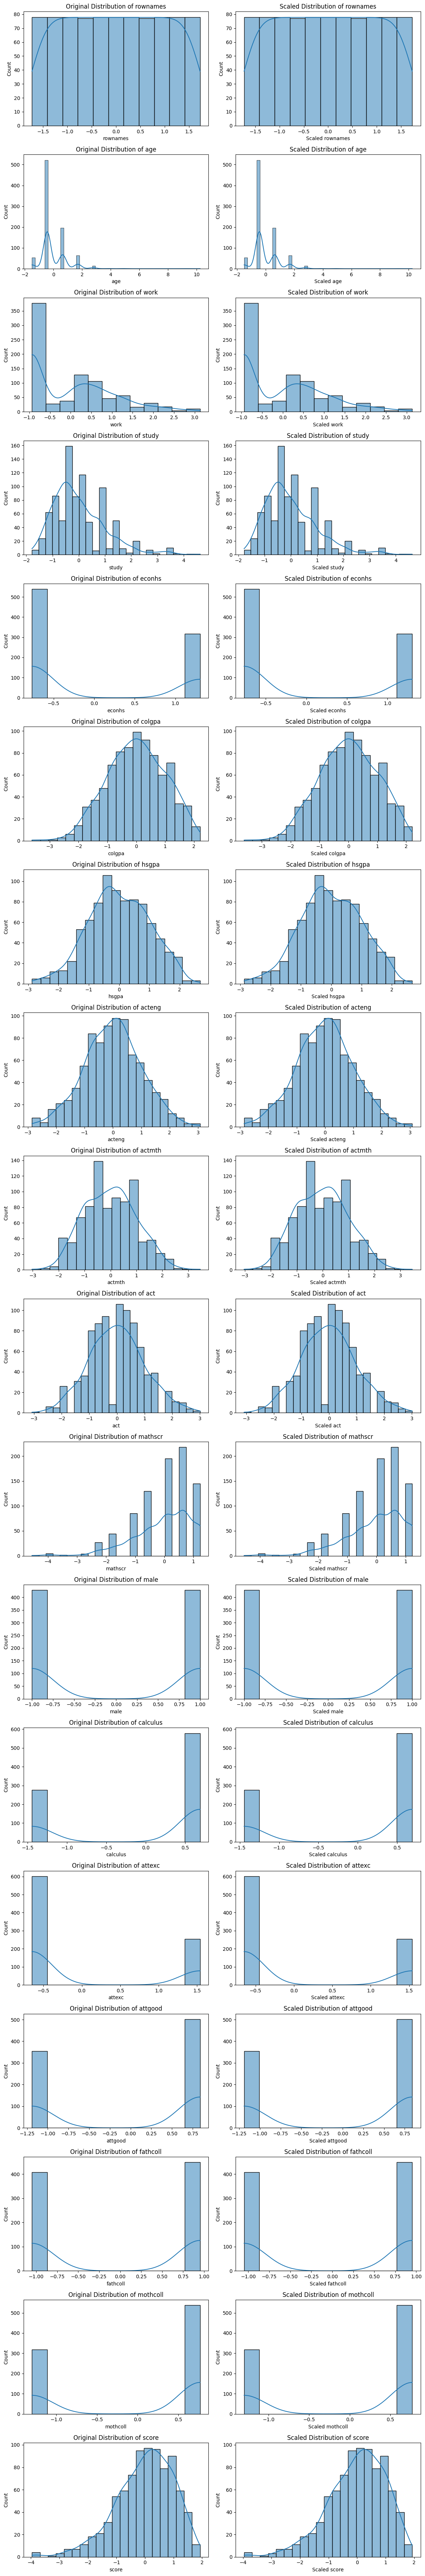

In [15]:
# Visualizations

# Plotting the distribution of numeric columns before and after scaling
fig, ax = plt.subplots(len(numeric_cols), 2, figsize=(12, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols):
    # Original Distribution
    sns.histplot(data[col], ax=ax[i, 0], kde=True)
    ax[i, 0].set_title(f'Original Distribution of {col}')
    ax[i, 0].set_xlabel(col)

    # Scaled Distribution
    sns.histplot(data[col], ax=ax[i, 1], kde=True)
    ax[i, 1].set_title(f'Scaled Distribution of {col}')
    ax[i, 1].set_xlabel(f'Scaled {col}')

plt.tight_layout()
plt.show()

# Binned 'govtspendgdp' Visualization
if 'govtspendgdp_binned' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='govtspendgdp_binned', data=data, palette="viridis")
    plt.title("Binned Distribution of 'govtspendgdp'")
    plt.xlabel("govtspendgdp Bins")
    plt.ylabel("Frequency")
    plt.show()

**MODULE 3**

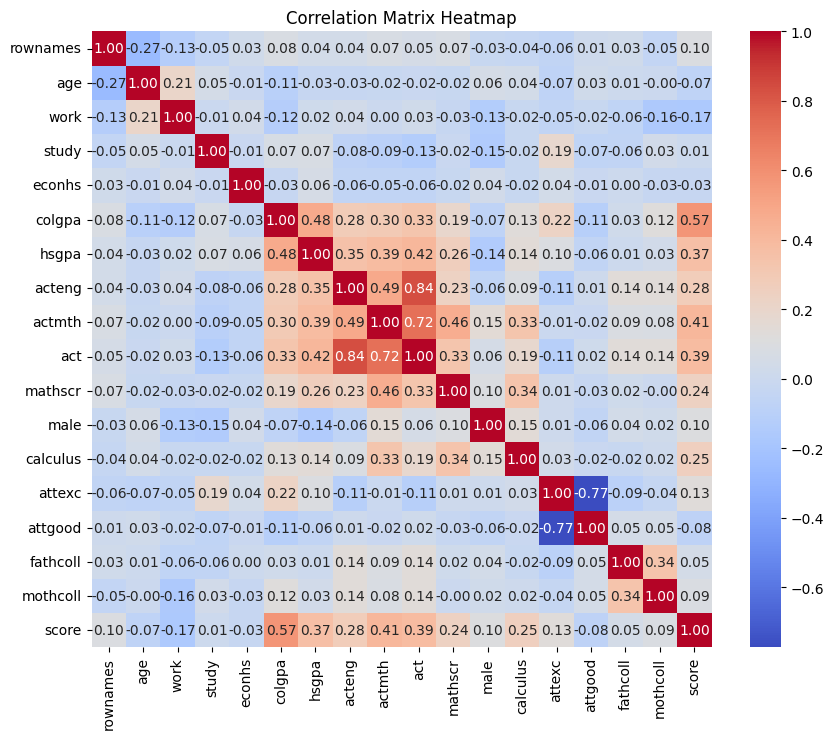

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
correlation_matrix = data.corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


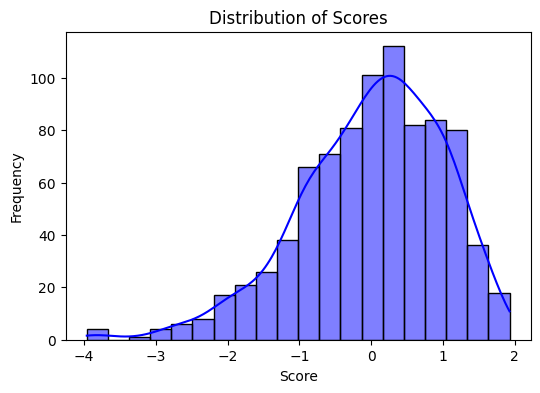

In [17]:
# Univariate Analysis: Distribution of Scores
plt.figure(figsize=(6, 4))
sns.histplot(data['score'], kde=True, bins=20, color="blue")
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


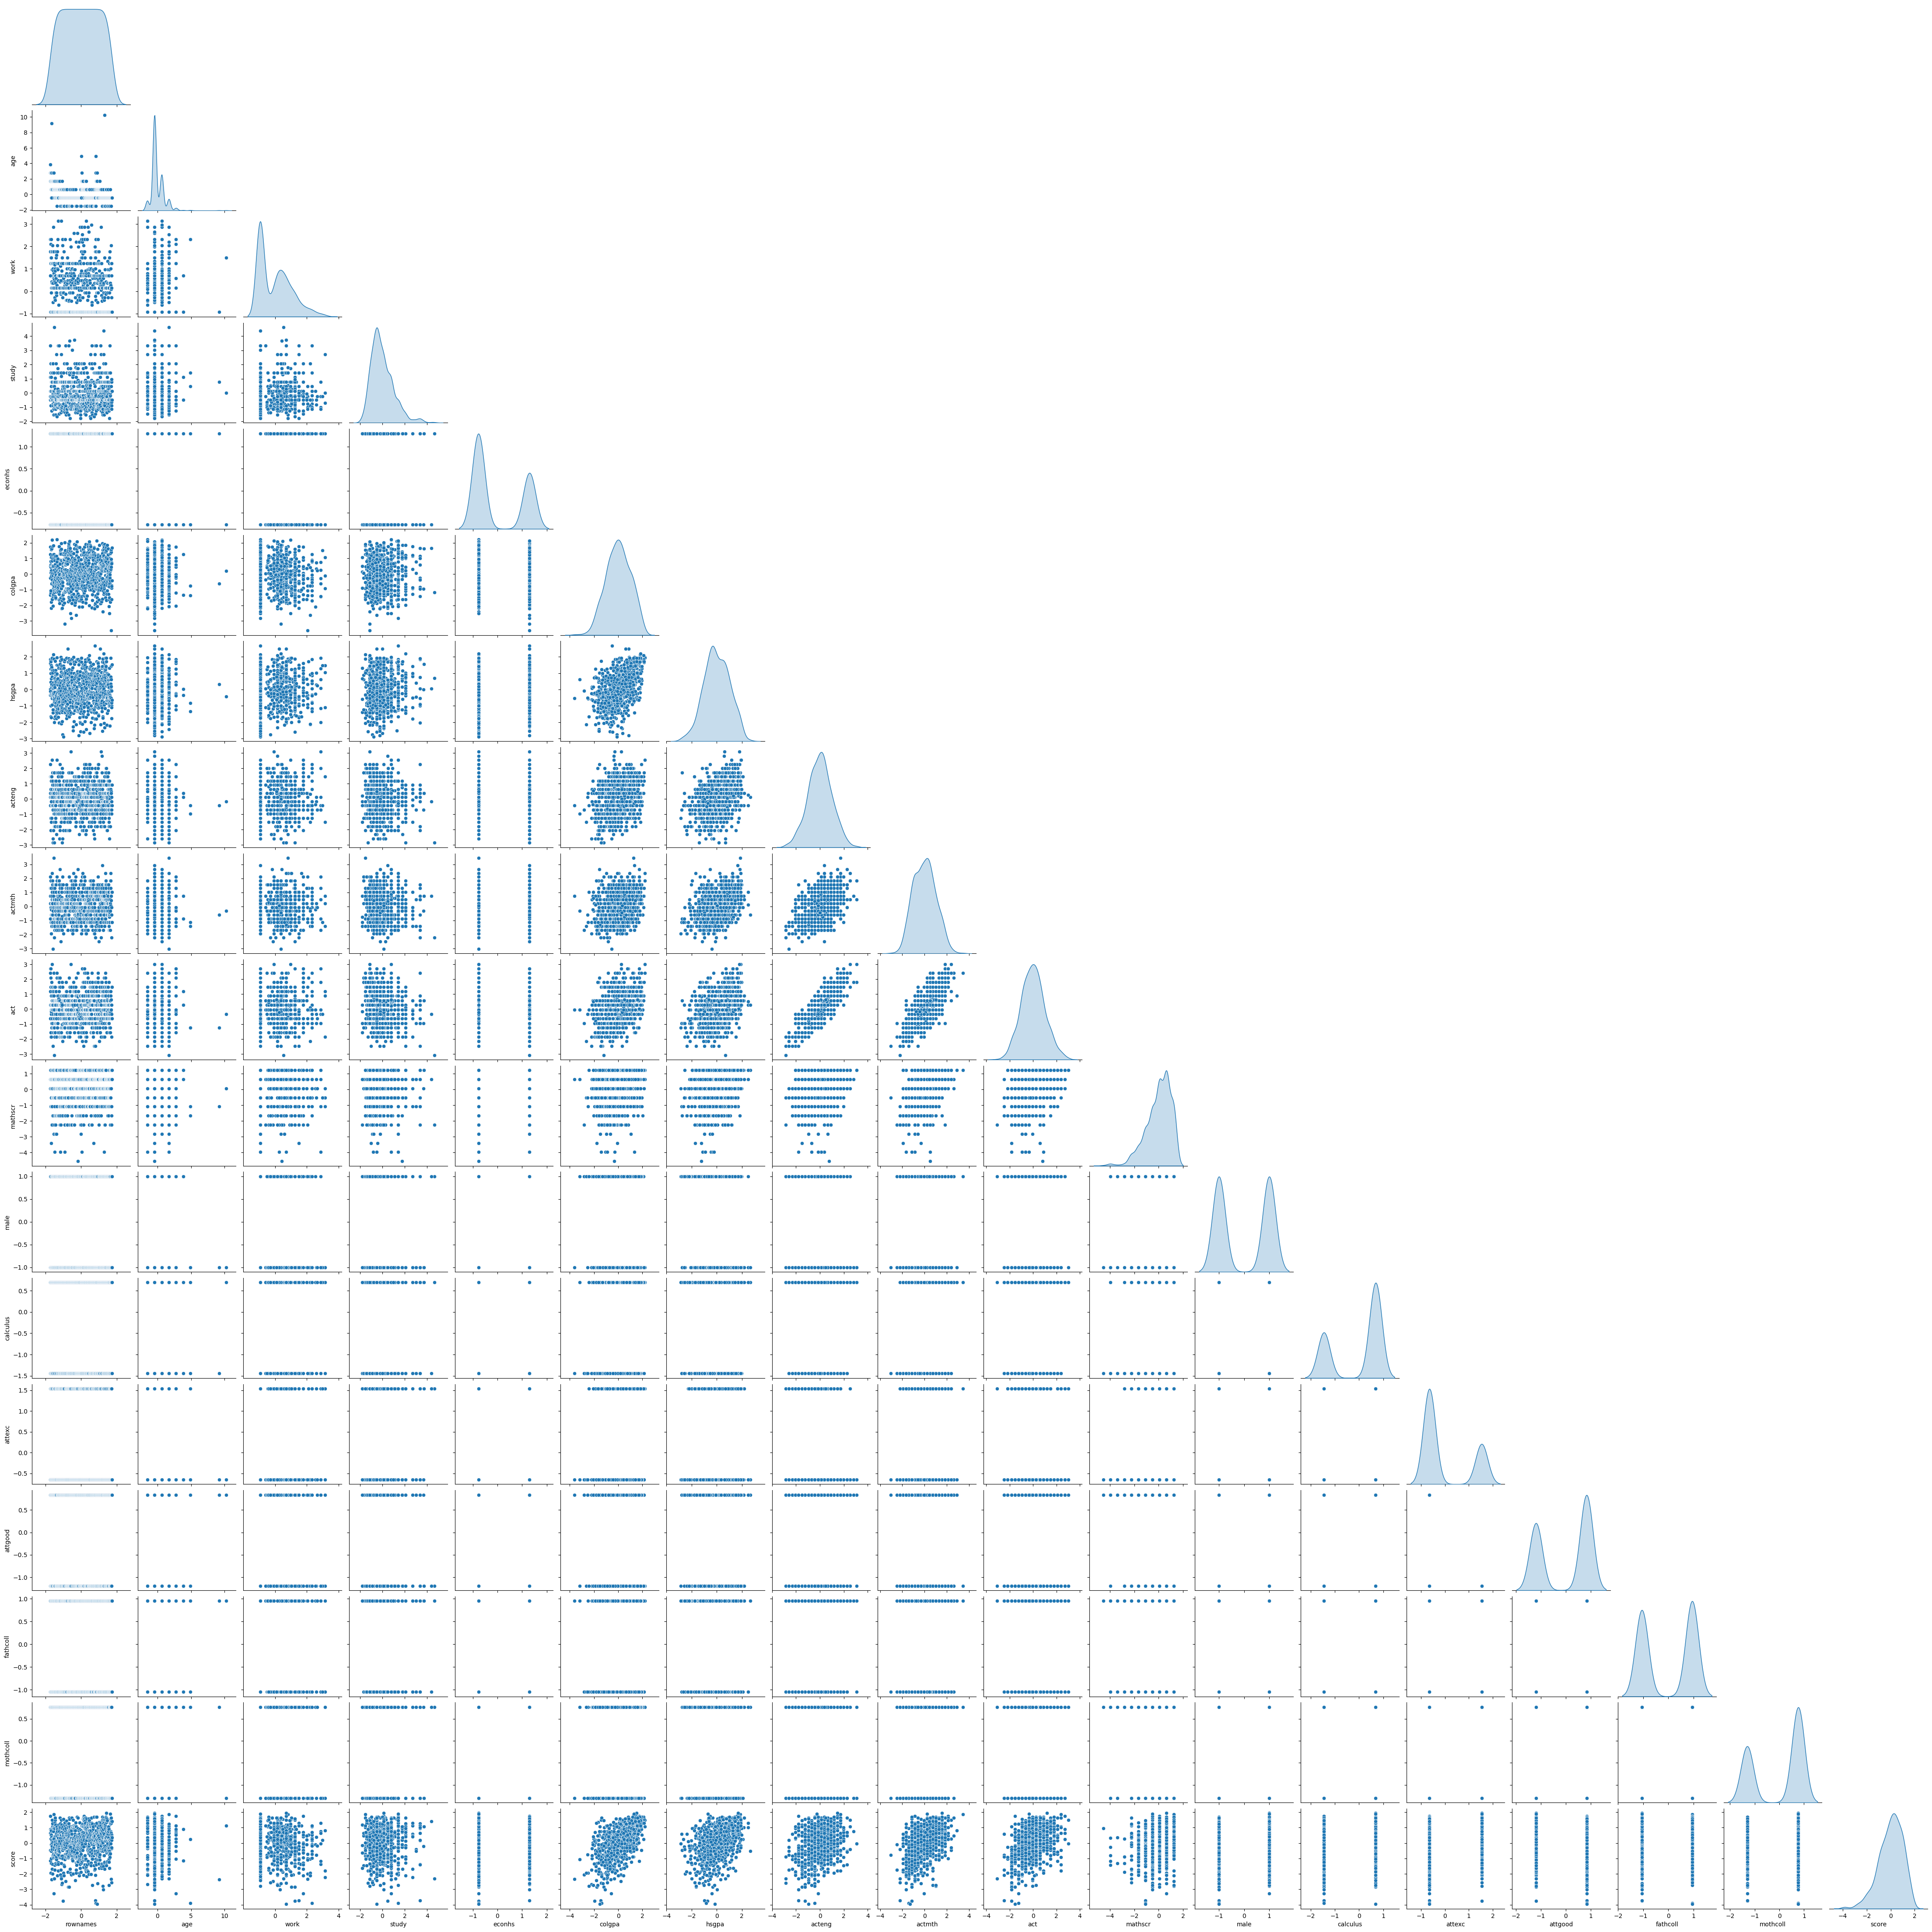

In [18]:
# Select numeric columns for pairplot
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Multivariate Analysis: Pairplot
sns.pairplot(data[numeric_cols], diag_kind='kde', corner=True)
plt.show()


In [22]:
# Check for any datetime column
if 'date' in data.columns:
    # Convert to datetime if not already
    data['date'] = pd.to_datetime(data['date'])

    # Set the 'date' column as the index
    data.set_index('date', inplace=True)

    # Plot time series of 'score' (example)
    plt.figure(figsize=(10, 6))
    data['score'].plot(title="Time Series of Scores", xlabel="Date", ylabel="Score", color="green")
    plt.show()

    # Resample (e.g., monthly mean)
    monthly_data = data['score'].resample('M').mean()
    plt.figure(figsize=(10, 6))
    monthly_data.plot(title="Monthly Mean of Scores", xlabel="Month", ylabel="Score", color="orange")
    plt.show()


**MODEULE 4**

In [23]:
# Statistical Summary Measures
summary = data.describe()
print(summary)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)


           rownames           age          work         study        econhs  \
count  8.560000e+02  8.560000e+02  8.560000e+02  8.560000e+02  8.560000e+02   
mean   6.640586e-17  2.905257e-16  3.735330e-17  9.753361e-17  3.735330e-17   
std    1.000585e+00  1.000585e+00  1.000585e+00  1.000585e+00  1.000585e+00   
min   -1.730029e+00 -1.502130e+00 -9.352145e-01 -1.784395e+00 -7.668938e-01   
25%   -8.650143e-01 -4.341704e-01 -9.352145e-01 -6.946286e-01 -7.668938e-01   
50%    0.000000e+00 -4.341704e-01 -6.782791e-02 -2.459013e-01 -7.668938e-01   
75%    8.650143e-01  6.337890e-01  6.911354e-01  5.233454e-01  1.303961e+00   
max    1.730029e+00  1.024542e+01  3.130660e+00  4.625994e+00  1.303961e+00   

             colgpa         hsgpa        acteng        actmth           act  \
count  8.560000e+02  8.560000e+02  8.560000e+02  8.560000e+02  8.560000e+02   
mean   2.988264e-16  9.960879e-16  4.399388e-16 -7.885696e-16  4.150366e-17   
std    1.000585e+00  1.000585e+00  1.000585e+00  1.

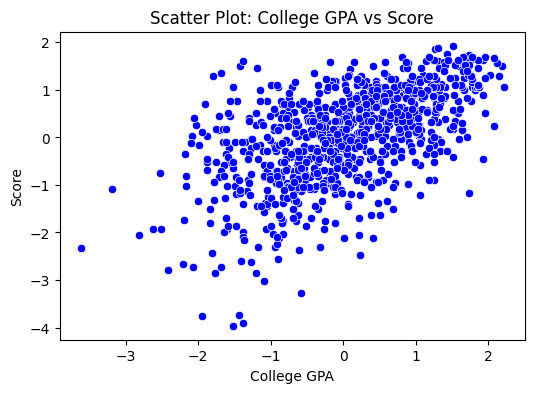

In [24]:
# Scatter plot of 'score' vs 'colgpa'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='colgpa', y='score', data=data, color='blue')
plt.title("Scatter Plot: College GPA vs Score")
plt.xlabel("College GPA")
plt.ylabel("Score")
plt.show()


<ipython-input-25-05908e37f61a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='male', y='score', data=data, jitter=True, palette="viridis")


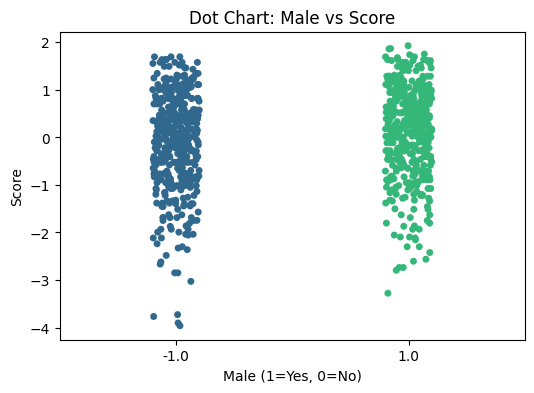

In [25]:
# Dot chart for a categorical variable (e.g., 'male') vs 'score'
plt.figure(figsize=(6, 4))
sns.stripplot(x='male', y='score', data=data, jitter=True, palette="viridis")
plt.title("Dot Chart: Male vs Score")
plt.xlabel("Male (1=Yes, 0=No)")
plt.ylabel("Score")
plt.show()


<ipython-input-28-77c3f2204967>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='calculus', y='score', data=data, ci=None, palette="coolwarm")
<ipython-input-28-77c3f2204967>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='calculus', y='score', data=data, ci=None, palette="coolwarm")


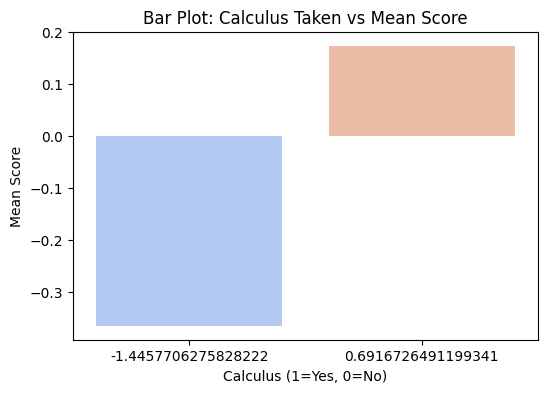

In [28]:
# Bar plot for a categorical variable (e.g., 'calculus') vs mean score
plt.figure(figsize=(6, 4))
sns.barplot(x='calculus', y='score', data=data, ci=None, palette="coolwarm")
plt.title("Bar Plot: Calculus Taken vs Mean Score")
plt.xlabel("Calculus (1=Yes, 0=No)")
plt.ylabel("Mean Score")
plt.show()


**MODULE 5**

In [29]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for clustering
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [30]:
from sklearn.cluster import SpectralClustering

# Perform Spectral Clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_model.fit_predict(scaled_data)

# Add clustering results to the dataset
data['Spectral_Cluster'] = spectral_labels
print(data['Spectral_Cluster'].value_counts())


Spectral_Cluster
2    403
1    253
0    200
Name: count, dtype: int64


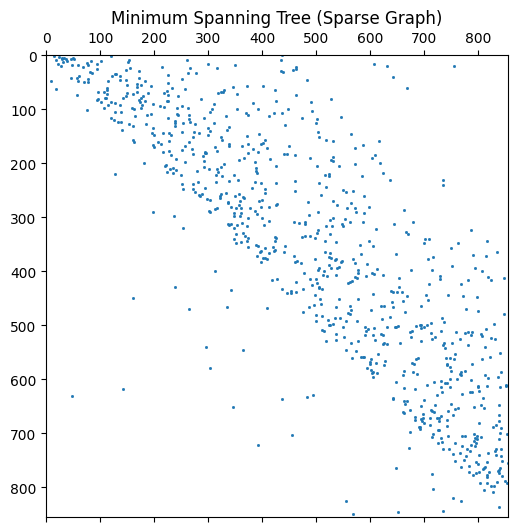

In [31]:
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.neighbors import kneighbors_graph

# Create a graph using k-nearest neighbors
graph = kneighbors_graph(scaled_data, n_neighbors=10, mode='distance')
mst = minimum_spanning_tree(graph)

# MST visualization (optional)
plt.figure(figsize=(8, 6))
plt.spy(mst, markersize=1)
plt.title("Minimum Spanning Tree (Sparse Graph)")
plt.show()


In [32]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo_model.fit_predict(scaled_data)

# Add clustering results to the dataset
data['Agglomerative_Cluster'] = agglo_labels
print(data['Agglomerative_Cluster'].value_counts())


Agglomerative_Cluster
1    408
0    256
2    192
Name: count, dtype: int64


In [33]:
from sklearn.neighbors import LocalOutlierFactor

# Perform outlier detection using Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(scaled_data)

# Identify outliers (-1 in the labels)
data['Outliers'] = (outlier_labels == -1).astype(int)
print(f"Number of Outliers Detected: {data['Outliers'].sum()}")


Number of Outliers Detected: 2


**MODULE 6**

In [34]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for dimensionality reduction
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


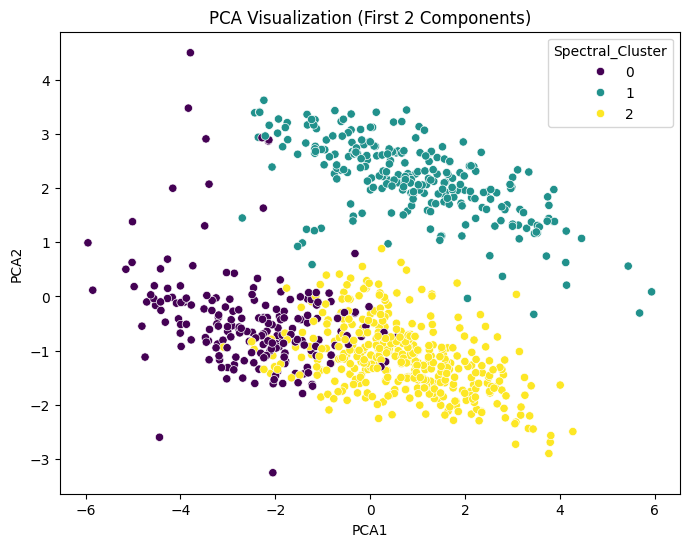

In [35]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

# Add PCA results to the dataset
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='Spectral_Cluster', palette='viridis', legend='full')
plt.title("PCA Visualization (First 2 Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


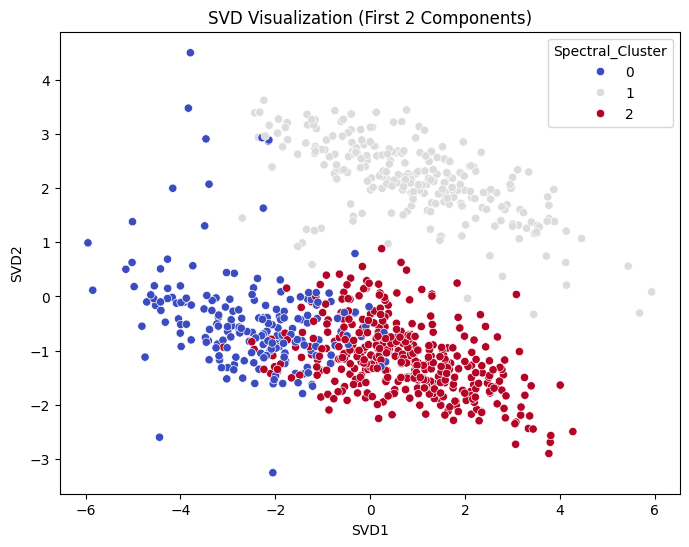

In [36]:
from sklearn.decomposition import TruncatedSVD

# Perform SVD
svd = TruncatedSVD(n_components=2)  # Reduce to 2 components for visualization
svd_data = svd.fit_transform(scaled_data)

# Plot SVD results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=svd_data[:, 0], y=svd_data[:, 1], hue=data['Spectral_Cluster'], palette='coolwarm', legend='full')
plt.title("SVD Visualization (First 2 Components)")
plt.xlabel("SVD1")
plt.ylabel("SVD2")
plt.show()


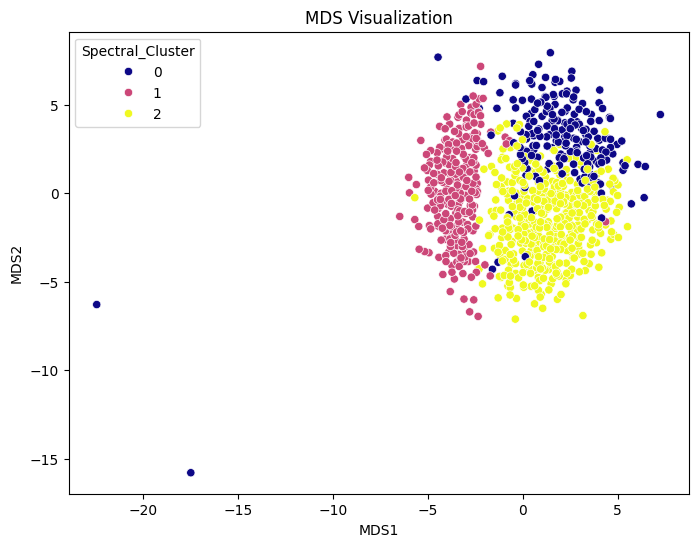

In [37]:
from sklearn.manifold import MDS

# Perform MDS
mds = MDS(n_components=2, random_state=42)
mds_data = mds.fit_transform(scaled_data)

# Plot MDS results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mds_data[:, 0], y=mds_data[:, 1], hue=data['Spectral_Cluster'], palette='plasma', legend='full')
plt.title("MDS Visualization")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.show()


**MODULE 7**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression
X = data[['colgpa', 'hsgpa', 'study']]  # Example predictors
y = data['score']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred = linear_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.65
R-squared: 0.34
